***
# <font color=blue>**Pymaceuticals, Inc**</font> 
***

## Squamous Cell Carcinoma Drug Treatment Analysis

### *Observed Trends:* 

1. *The Capumolin drug was the only treatment that resulted in a reduction in tumor volume over time as well as the 
    highest survival rate for lab mice over time*
1. *The survival rates of the test mice declined rapidly over time*
1. *The number of cancer-spreading sites increased over time for each treatment*

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
from scipy.stats import sem

target_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
num_of_target_drugs = len(target_drugs)

In [8]:
#Disable autoscrolling for images or graphs
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

SyntaxError: invalid syntax (<ipython-input-8-63efbedb1faf>, line 2)

In [9]:
ct_data_df = pd.read_csv("raw_data/clinicaltrial_data.csv", low_memory=False)
md_data_df = pd.read_csv("raw_data/mouse_drug_data.csv", low_memory=False)
combined_data_df = pd.merge(ct_data_df, md_data_df, how='outer', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


<br>
<br>
### Tumor Response to Treatment

In [10]:
new_mean_df_grouped = combined_data_df.groupby(["Drug", "Timepoint"])[['Tumor Volume (mm3)']].mean()
new_mean_df_grouped

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [11]:
new_sem_df_grouped = combined_data_df.groupby(["Drug", "Timepoint"])[['Tumor Volume (mm3)']].sem()
new_sem_df_grouped.head(15)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482

In [12]:
tumor_vol_mean_df = new_mean_df_grouped.pivot_table(index=["Timepoint"], values=["Tumor Volume (mm3)"], columns=["Drug"])
tumor_vol_mean_df.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [13]:
tumor_vol_sem_df = new_sem_df_grouped.pivot_table(index=["Timepoint"], values=["Tumor Volume (mm3)"], columns=["Drug"])
tumor_vol_sem_df.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

In [14]:
target_drugs_tumor_vol_mean_df = tumor_vol_mean_df.loc[:, ('Tumor Volume (mm3)', target_drugs)]
print(target_drugs_tumor_vol_mean_df)

vol_list = list((target_drugs_tumor_vol_mean_df.as_matrix(columns=target_drugs_tumor_vol_mean_df.columns[0:1])).flatten())
drug_group_mean_vol = vol_list

for i in range(num_of_target_drugs - 1):
    vol_list = list((target_drugs_tumor_vol_mean_df.as_matrix(columns=target_drugs_tumor_vol_mean_df.columns[i+1:i+2])).flatten())
    drug_group_mean_vol = np.vstack([drug_group_mean_vol, vol_list])
    

          Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589
10                 43.084291  49.403909  49.582269  49.423329
15                 42.064317  51.296397  52.399974  51.359742
20                 40.716325  53.197691  54.920935  54.364417
25                 39.939528  55.715252  57.678982  57.482574
30                 38.769339  58.299397  60.994507  59.809063
35                 37.816839  60.742461  63.371686  62.420615
40                 36.958001  63.162824  66.068580  65.052675
45                 36.236114  65.755562  70.662958  68.084082


In [16]:
target_drugs_tumor_vol_sem_df = tumor_vol_sem_df.loc[:, ('Tumor Volume (mm3)', target_drugs)]
print(target_drugs_tumor_vol_sem_df)

vol_list2 = list((target_drugs_tumor_vol_sem_df.as_matrix(columns=target_drugs_tumor_vol_sem_df.columns[0:1])).flatten())
drug_group_sem_vol = vol_list2

for i in range(num_of_target_drugs - 1):
    vol_list2 = list((target_drugs_tumor_vol_sem_df.as_matrix(columns=target_drugs_tumor_vol_sem_df.columns[i+1:i+2])).flatten())
    drug_group_sem_vol = np.vstack([drug_group_sem_vol, vol_list2])


          Tumor Volume (mm3)                              
Drug               Capomulin Infubinol  Ketapril   Placebo
Timepoint                                                 
0                   0.000000  0.000000  0.000000  0.000000
5                   0.448593  0.235102  0.264819  0.218091
10                  0.702684  0.282346  0.357421  0.402064
15                  0.838617  0.357705  0.580268  0.614461
20                  0.909731  0.476210  0.726484  0.839609
25                  0.881642  0.550315  0.755413  1.034872
30                  0.934460  0.631061  0.934121  1.218231
35                  1.052241  0.984155  1.127867  1.287481
40                  1.223608  1.055220  1.158449  1.370634
45                  1.223977  1.144427  1.453186  1.351726


In [17]:
time_values = list(target_drugs_tumor_vol_mean_df.index.get_level_values('Timepoint'))
print(time_values)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


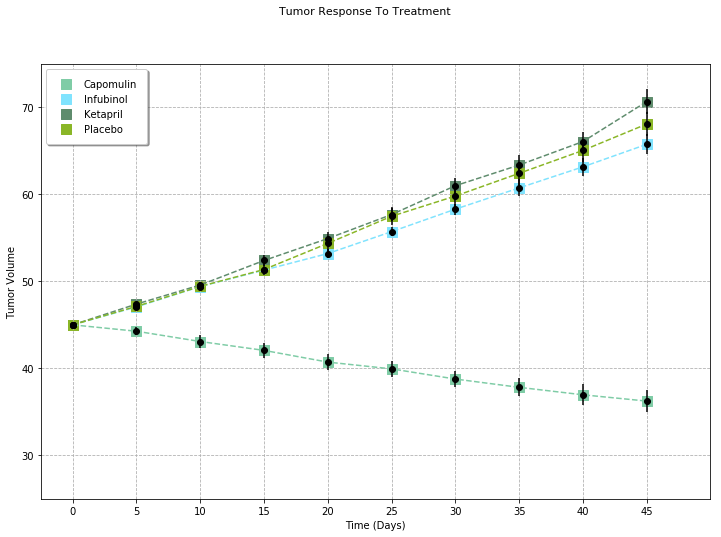

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Tumor Response To Treatment", fontsize=11)

x_axis = np.arange(0, len(time_values), 1)
ax.margins(0.05)
ax.grid(ls='dashed')
ax.set_xlim(-0.5, len(time_values))
ax.set_ylim(25, 75)
ax.set_xticks(range(0, len(time_values)))
ax.set_xticklabels(time_values)
ax.set_ylabel("Tumor Volume")
ax.set_xlabel("Time (Days)")

for name, means, sems in zip(target_drugs, drug_group_mean_vol, drug_group_sem_vol):
    plot_color = np.random.rand(3,)
    ax.scatter(x_axis, means, s=90, marker='s', label=name, c=plot_color)
    ax.plot(x_axis, means, '--', ms=12, c=plot_color)
    ax.errorbar(x_axis, means, yerr=sems, fmt='o', c='#000000')

ax.legend(loc="best", fontsize="medium", fancybox=True, shadow=True, borderpad=1)

plt.show()


<br>
<br>
### Metastatic Response to Treatment 

In [19]:
meta_df_grouped = combined_data_df.groupby(["Drug", "Timepoint"])[['Metastatic Sites']].mean()
meta_df_grouped.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [20]:
meta_sem_df_grouped = combined_data_df.groupby(["Drug", "Timepoint"])[['Metastatic Sites']].sem()
meta_sem_df_grouped.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [21]:
meta_df2 = meta_df_grouped.pivot_table(index=["Timepoint"], values=["Metastatic Sites"], columns=["Drug"])
meta_df2.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [22]:
meta_sem_df2 = meta_sem_df_grouped.pivot_table(index=["Timepoint"], values=["Metastatic Sites"], columns=["Drug"])
meta_sem_df2.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [23]:
target_drugs_meta_mean_df = meta_df2.loc[:, ('Metastatic Sites', target_drugs)]
print(target_drugs_meta_mean_df)
print('---------------------------------------------------------------------')

meta_list = list((target_drugs_meta_mean_df.as_matrix(columns=target_drugs_meta_mean_df.columns[0:1])).flatten())
drug_group_mean_meta = meta_list

for i in range(num_of_target_drugs - 1):
    meta_list = list((target_drugs_meta_mean_df.as_matrix(columns=target_drugs_meta_mean_df.columns[i+1:i+2])).flatten())
    drug_group_mean_meta = np.vstack([drug_group_mean_meta, meta_list]) 

target_drugs_meta_sem_df = meta_sem_df2.loc[:, ('Metastatic Sites', target_drugs)]
print(target_drugs_meta_sem_df)
print('---------------------------------------------------------------------')

meta_list = list((target_drugs_meta_sem_df.as_matrix(columns=target_drugs_meta_sem_df.columns[0:1])).flatten())
drug_group_sem_meta = meta_list

for i in range(num_of_target_drugs - 1):
    meta_list = list((target_drugs_meta_sem_df.as_matrix(columns=target_drugs_meta_sem_df.columns[i+1:i+2])).flatten())
    drug_group_sem_meta = np.vstack([drug_group_sem_meta, meta_list])
    
time_values = list(target_drugs_meta_mean_df.index.get_level_values('Timepoint'))

          Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727
---------------------------------------------------------------------
          Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 

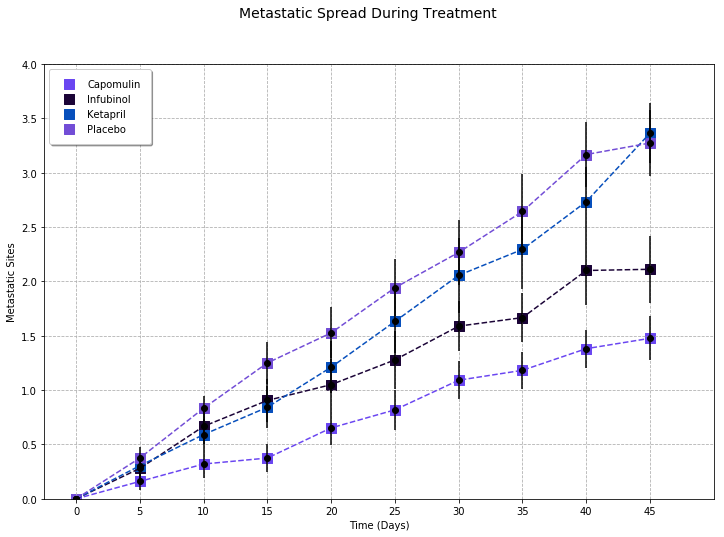

In [24]:
fig2, ax2 = plt.subplots(figsize=(12,8))
fig2.suptitle("Metastatic Spread During Treatment", fontsize=14)

x_axis = np.arange(0, len(time_values), 1)
ax2.margins(0.05)
ax2.grid(ls='dashed')
ax2.set_xlim(-0.5, len(time_values))
ax2.set_ylim(0.0, 4.0)
ax2.set_xticks(range(0, len(time_values)))
ax2.set_xticklabels(time_values)
ax2.set_ylabel("Metastatic Sites")
ax2.set_xlabel("Time (Days)")

for name, means, sems in zip(target_drugs, drug_group_mean_meta, drug_group_sem_meta):
    plot_color = np.random.rand(3,)
    ax2.scatter(x_axis, means, s=90, marker='s', label=name, c=plot_color)
    ax2.plot(x_axis, means, '--', ms=12, c=plot_color)
    ax2.errorbar(x_axis, means, yerr=sems, fmt='o', c='#000000')

ax2.legend(loc="best", fontsize="medium", fancybox=True, shadow=True, borderpad=1)

plt.show()

<br>
<br>
### Survival Rates

In [25]:
survived_df_grouped = combined_data_df.groupby(["Drug", "Timepoint"])[['Mouse ID']].count()
survived_df_grouped = survived_df_grouped.rename(columns={"Mouse ID":"Mouse Count"})
survived_df_grouped.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [26]:
survived_df2 = survived_df_grouped.pivot_table(index=["Timepoint"], values=["Mouse Count"], columns=["Drug"])
survived_df2.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [27]:
target_drugs_survived_df = survived_df2.loc[:, ('Mouse Count', target_drugs)]
print(target_drugs_survived_df)

target_percent_survived_df = target_drugs_survived_df.apply(lambda x:100 * x / target_drugs_survived_df.iloc[0,0])

percent_survived_list = list((target_percent_survived_df.as_matrix(columns=target_percent_survived_df.columns[0:1])).flatten())
percent_survived = percent_survived_list

for i in range(num_of_target_drugs - 1):
    percent_survived_list = list((target_percent_survived_df.as_matrix(columns=target_percent_survived_df.columns[i+1:i+2])).flatten())
    percent_survived = np.vstack([percent_survived, percent_survived_list])
    
#print(percent_survived)

          Mouse Count                           
Drug        Capomulin Infubinol Ketapril Placebo
Timepoint                                       
0                  25        25       25      25
5                  25        25       23      24
10                 25        21       22      24
15                 24        21       19      20
20                 23        20       19      19
25                 22        18       19      17
30                 22        17       18      15
35                 22        12       17      14
40                 21        10       15      12
45                 21         9       11      11


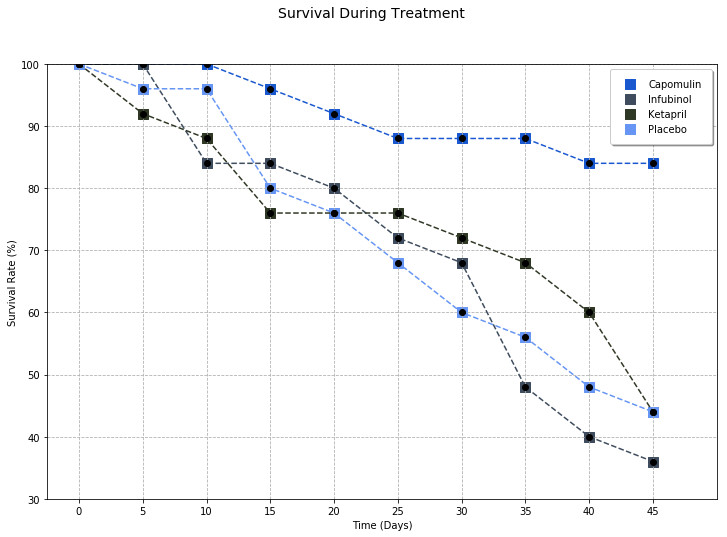

In [28]:
fig3, ax3 = plt.subplots(figsize=(12,8))
fig3.suptitle("Survival During Treatment", fontsize=14)

x_axis = np.arange(0, len(time_values), 1)
ax3.margins(0.05)
ax3.grid(ls='dashed')
ax3.set_xlim(-0.5, len(time_values))
ax3.set_ylim(30, 100)
ax3.set_xticks(range(0, len(time_values)))
ax3.set_xticklabels(time_values)
ax3.set_ylabel("Survival Rate (%)")
ax3.set_xlabel("Time (Days)")

for name, count in zip(target_drugs, percent_survived):
    plot_color = np.random.rand(3,)
    ax3.scatter(x_axis, count, s=90, marker='s', label=name, c=plot_color)
    ax3.plot(x_axis, count, '--', ms=12, c=plot_color)
    ax3.errorbar(x_axis, count, yerr=sems, fmt='o', c='#000000')

ax3.legend(loc="best", fontsize="medium", fancybox=True, shadow=True, borderpad=1)

plt.show()


<br>
<br>
### Summary Bar Graph

In [29]:
tumor_vol_start = (new_mean_df_grouped.iloc[new_mean_df_grouped.index.get_level_values('Timepoint') == 0]).unstack(level=1)
tumor_vol_start.columns = tumor_vol_start.columns.droplevel()

tumor_vol_end = (new_mean_df_grouped.iloc[new_mean_df_grouped.index.get_level_values('Timepoint') == 45]).unstack(level=1)
tumor_vol_end.columns = tumor_vol_end.columns.droplevel()

tumor_vol_chng = pd.concat([tumor_vol_start,tumor_vol_end], axis=1)
tumor_vol_chng.columns.name = None

tumor_vol_perc_chng = (1-(tumor_vol_chng.iloc[:,0].div(tumor_vol_chng.iloc[:,1], axis=0))).mul(100)
print(tumor_vol_perc_chng)

Drug
Capomulin   -24.185502
Ceftamin     29.832682
Infubinol    31.564725
Ketapril     36.317412
Naftisol     35.032598
Placebo      33.905256
Propriva     32.084215
Ramicane    -28.734757
Stelasyn     34.247354
Zoniferol    31.777753
dtype: float64


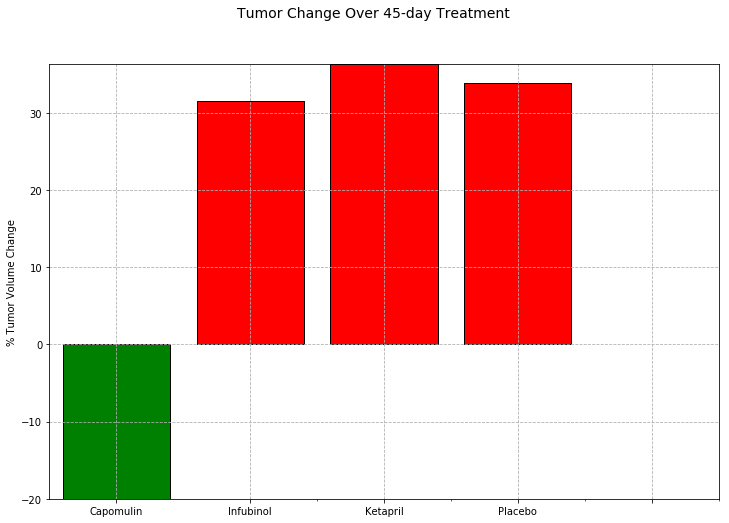

In [30]:
target_drugs_perc_chng = tumor_vol_perc_chng.loc[target_drugs].tolist()
target_drugs_x = ['0','Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

tumor_vol_chng_plot = pd.DataFrame({'perc' : target_drugs_perc_chng})
tumor_vol_chng_plot['colors'] = 'g'
tumor_vol_chng_plot.loc[tumor_vol_chng_plot.perc>=0,'colors'] = 'r'

fig4, ax4 = plt.subplots(figsize=(12, 8))
fig4.suptitle("Tumor Change Over 45-day Treatment", fontsize=14)

x_axis = np.arange(len(target_drugs))
ax4.bar(tumor_vol_chng_plot.index, tumor_vol_chng_plot.perc, color=tumor_vol_chng_plot.colors, align='center', edgecolor='black')
ax4.grid(ls='dashed')
ax4.set_xlim(-0.5, len(x_axis))
ax4.set_ylim(-20, max(target_drugs_perc_chng))
ax4.set_ylabel("% Tumor Volume Change")
ax4.set_xticklabels(target_drugs_x)
ax4.set_xticks([value + 1.5 for value in x_axis], target_drugs)

plt.show()
